Notes - Anaconda python library distribution (you should install if you haven't already), chapter requires knowledge of calculus, will to take pauses for questions/comments.

In [14]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###  Chapter 3 - Numerical Computation

#### Softmax in context of Underflow/Overflow

$$softmax(\textbf{x})_i = \frac{exp(x_i)}{\sum_{j=1}^n exp(x_j)} $$

Takes a vector of values and "squashes"them to between (0,1)

In [15]:
def softmax_v1(x):
    denominator = 0
    for i in x:
        denominator += np.exp(i)
    sm = []
    for j in x:
        sm.append(np.exp(j)/denominator)
    return sm

def softmax_v2(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [16]:
softmax_v1([-1,1])

[0.11920292202211756, 0.88079707797788243]

In [17]:
softmax_v1([-0.5,-0.45, -0.4, 1])

[0.13092207883043003,
 0.13763459735189443,
 0.14469127405739868,
 0.58675204976027673]

In [18]:
#Underflow occurs when numbers near zero are rounded to zero 

#example
print softmax_v1([-10000, -1000])

# print np.exp(-1000)

[nan, nan]


In [19]:
#Overflow - occurs when numbers when numbers with large magnitude are approximated as ∞ or −∞

#example
# print softmax_v1([1000, 10000])

# print np.exp(1000)

In [20]:
#Can deal with these cases by subtracting max(x1, x2)
def softmax(x):
    denominator = 0
    for i in x:
        denominator += np.exp(i - max(x))
    sm = []
    for j in x:
        sm.append(np.exp(j - max(x))/denominator)
    return sm

In [21]:
print softmax_v1([1000, 10000])

[nan, nan]


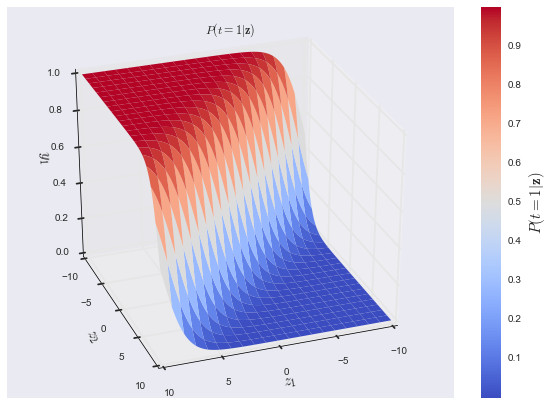

In [22]:
#Code for graph from http://peterroelants.github.io/posts/neural_network_implementation_intermezzo02/

from matplotlib import figure
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

nb_of_zs = 200
zs = np.linspace(-10, 10, num=nb_of_zs) # input 
zs_1, zs_2 = np.meshgrid(zs, zs) # generate grid
y = np.zeros((nb_of_zs, nb_of_zs, 2)) # initialize output
# Fill the output matrix for each combination of input z's
for i in range(nb_of_zs):
    for j in range(nb_of_zs):
        y[i,j,:] = softmax(np.asarray([zs_1[i,j], zs_2[i,j]]))
# Plot the cost function surfaces for both classes
fig = plt.figure()
# Plot the cost function surface for t=1
ax = fig.gca(projection='3d')
surf = ax.plot_surface(zs_1, zs_2, y[:,:,0], linewidth=0, cmap=cm.coolwarm)
ax.view_init(elev=30, azim=70)
cbar = fig.colorbar(surf)
ax.set_xlabel('$z_1$', fontsize=15)
ax.set_ylabel('$z_2$', fontsize=15)
ax.set_zlabel('$y_1$', fontsize=15)
ax.set_title ('$P(t=1|\mathbf{z})$')
cbar.ax.set_ylabel('$P(t=1|\mathbf{z})$', fontsize=15)

#Increase size of plot
fig = plt.gcf()
fig.set_size_inches(10, 7)

Questions

## Gradient-Based Optimization

Optimization refers to minimizing or maximizing some function _f(x)_ by altering _x_. This function, _f(x)_ is called the objective function. Often we say minimizing the *cost function, loss function, error function*. 

Motivation - Linear Regression 

Given many pairs of (x,y), we can find optimal vector $\boldsymbol{\theta}$ = $(\theta_0, \theta_1)$ using least squares

$$y_i = \theta_0 + \theta_1 x_i $$
$$i = 1,2,...,n$$
Cost Function 
$$ \sum_{j=1}^n (y_i - \theta_0 - \theta_1 x_i)^2$$

The point _x_ that minimizes the function _f(x)_ is often referred to as _x_*

Example

$$f(x) = \frac{1}{2}x^2 $$

In [23]:
def f(x):
    return 0.5 * x**2

x = np.linspace(-2, 2, 100)

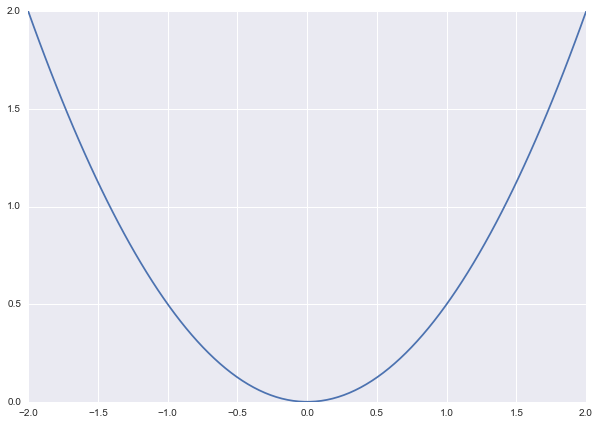

In [24]:
plt.plot(x, f(x))

#Increase size of plot 
fig = plt.gcf()
fig.set_size_inches(10, 7)

First derivative of our example:

$$ f'(x) = x $$

or 

$$ \frac{dy}{dx} = x $$
 

First derivative of a function of a single variable is the slope of the tangent line on the graph at that point

In [25]:
def f_prime(x):
    return x

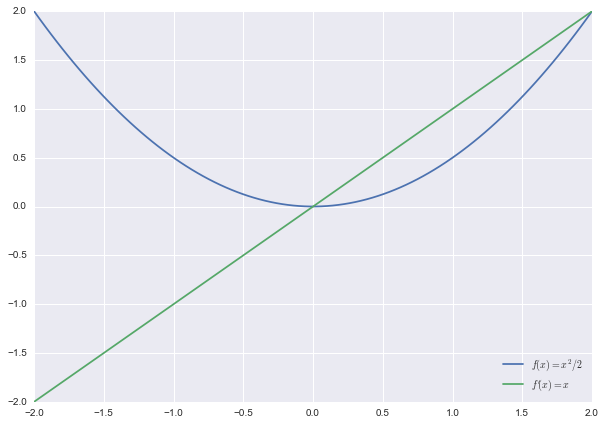

In [26]:
plt.plot(x, f(x))
plt.plot(x, f_prime(x))
plt.legend( ["$ f(x)=x^2/2 $", "$f'(x) = x$"], loc=4)

#Increase size of plot
fig = plt.gcf()
fig.set_size_inches(10, 7)

Consider x > 0, what direction do we go to get to minimum?
Consider x < 0. x = 0?

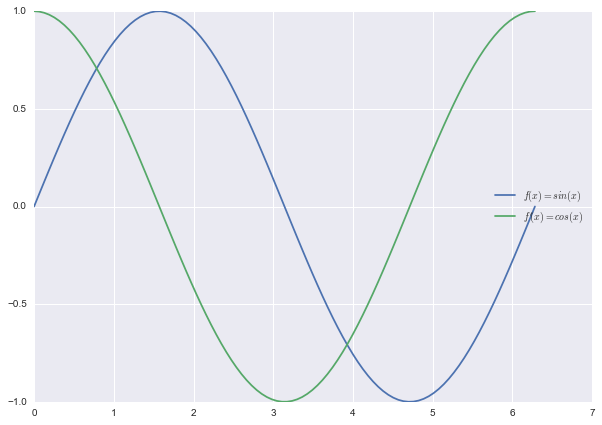

In [27]:
def f(x):
    return np.sin(x)
def f_prime(x):
    return np.cos(x)

x = np.linspace(0, 2*np.pi, 100)

plt.plot(x, f(x))
plt.plot(x, f_prime(x))
plt.legend( ["$ f(x)=sin(x) $", "$f'(x) = cos(x)$"], loc=7)
#Increase size of plot
fig = plt.gcf()
fig.set_size_inches(10, 7)

$f'(x)$ gives the slope of $f(x)$ at the point $x$

Types of Critical Points in 1-D (Fig. 4.2)
<img src="images/critical_points.png">

It speciﬁes how to scale a small change in the input in order to obtain the corresponding change in the output: $$ f (x + \epsilon) ≈ f(x) + \epsilon f'(x) $$


"Useful for minimizing a function since it tells us how to make a change in x in order to make a small improvement in y"

If slope is positive, we want to move in opposite direction, if slope is negative, we want to move in this direction. 

Local vs Global Minimums (Fig 4.3)
<img src="images/local_vs_global_min.png">

This was the case for  $ f:\mathbb{R} -> \mathbb{R}$.  Scalar output required for concept of minimization. We often have multiple inputs, we need to generalize our concept of gradient to work with $ f:\mathbb{R}^n -> \mathbb{R}$ 

Genarlizing the derivative to a vector input - Gradient. 
"Moving along _f(x)_ in the opposite direction of gradient until we reach critical point (when _f'(x)_ = 0). "

Partial Derivatives - 
$$ \frac{d}{dx_i} f(\textbf{x})$$
The derivative with respect to $x_i$ measures only how $f$ changes as $x_i$ increases at point $x$. By taking all partial derivatives, we can get rate of change in direction of all axes. 

"The gradient generalizes the notion of derivativeto the case where the derivative is with respect to a vector: the gradient is the vector containing all of the partial derivatives, denoted $\nabla_x f(x)$

For $f(x,y) = x^2 + y^2$ , 

$$ \nabla f(x) = 
\left(\begin{array}{cc} 
\frac{d}{dx} f({x,y})\\
\frac{d}{dy} f({x,y})
\end{array}\right) = 
\left(\begin{array}{cc} 
2x\\
2y
\end{array}\right)$$

Directional Derivative...Nice breakdown proving why the gradient points directly uphill, or the direction of steepest ascent (4.3, 4.4). Moving in opposite direction of gradient is steepest descent. 

In [28]:
def bowl(a):
    return a[0]**2 + a[1]**2

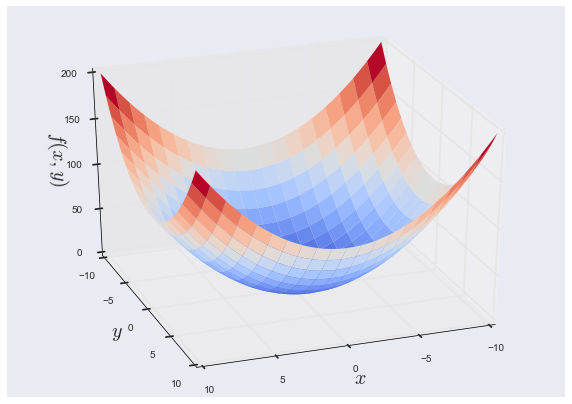

In [29]:
nb_of_zs = 200
zs = np.linspace(-10, 10, num=nb_of_zs) # input 
zs_1, zs_2 = np.meshgrid(zs, zs) # generate grid
y = np.zeros((nb_of_zs, nb_of_zs, 2)) # initialize output
# Fill the output matrix for each combination of input z's
for i in range(nb_of_zs):
    for j in range(nb_of_zs):
        y[i,j,:] = bowl(np.asarray([zs_1[i,j], zs_2[i,j]]))

# Plot the cost function surfaces for both classes
fig = plt.figure()
# Plot the cost function surface for t=1
ax = fig.gca(projection='3d')
surf = ax.plot_surface(zs_1, zs_2, y[:,:,0], linewidth=0, cmap=cm.coolwarm)
ax.view_init(elev=30, azim=70)
# cbar = fig.colorbar(surf)
ax.set_xlabel('$x$', fontsize=20)
ax.set_ylabel('$y$', fontsize=20)
ax.set_zlabel('$f(x,y)$', fontsize=20)

#Increase size of plot
fig = plt.gcf()
fig.set_size_inches(10, 7)

At point (5,5) what direction is the gradient pointing in?  (0,0)?

Learning Rate ($\epsilon$) can be used in a few ways. It is essentially the "step size" you want to take as you follow the gradient until it vanishes, or gets very small. 

$$\theta_{k+1} = \theta_k - \epsilon \nabla f(\boldsymbol\theta_k)$$


Slides from Nando De Freitas - https://www.cs.ox.ac.uk/people/nando.defreitas/machinelearning/lecture5.pdf

Steepest gradient descent slide & step size

Further Motivation - Linear Regression 

Given many pairs of (x,y), we can find optimal vector $\boldsymbol{\theta}$ = $(\theta_0, \theta_1)$ with least squares

$$y_i = \theta_0 + \theta_1 x_i $$
$$i = 1,2,...,n$$
Cost Function 
$$ \sum_{j=1}^n (y_i - \theta_0 - \theta_1 x_i)^2$$
$$ f(\boldsymbol{\theta}) = (\textbf{y} - \textbf{X} \boldsymbol{\theta})^T(\textbf{y} - \textbf{X}\boldsymbol{\theta}) = \sum_{j=1}^n (y_i - \textbf{x}_i \boldsymbol{\theta})^2  $$

Gradient

$$\nabla f(\theta) = -2\textbf{X}^T\textbf{y} + 2\textbf{X}^T\textbf{X}\boldsymbol\theta$$


Gradient Descent


$$ \boldsymbol\theta_{k+1} = \boldsymbol\theta_k - \epsilon[\nabla f(\boldsymbol\theta_k)] $$

## Beyond the Gradient: Jacobian & Hessian

When input and output both vectors, we are interested in finding all partial derivatives, which can be laid out in a matrix, known as the Jacobian. 

Specifically, $$f:\mathbb{R}^m -> \mathbb{R}^n$$

then Jacobian _J_ takes shape $\mathbb{R}^{nxm}$ where $$J(i,j)= \frac{d}{dx_j} f(x_i)$$


“The Jacobian is the generalization of the gradient for vector-valued function of several variables"



<img src="images/jacobian.svg">

Before we go on to to the Hessian, lets recall how the $f'(x)$ and $f''(x)$ are related to $f(x)$

The same way that the first derivative shows the rate of change of f(x) as we increase x by a unit, the second derivative shows the rate of change of f'(x) as increase x by a unit. 

The second derivative is measuring curvature. 

Think of location f(t), velocity f'(t), acceleration f''(t) where t is time for intuition

The Jacobian of the gradient is the Hessian

$$H(f)(x)_{i,j}= \frac{d^2}{d^x_idx_j} f(\textbf{x})$$

The direction of the "most curvature" is in direction of Hessian eigenvector with highest eigenvalue.  (Explain intuition of highest to lowest eigenvalues and correspoinding eigenvectors)

$f'(x) = 0$ and $f''(x) > 0$, then x is a local minimum for $f:\mathbb{R}^n->\mathbb{R}$

The analogous case for the Hessian is found by examining the eigenvalues.

When the Hessian has a poor condition number (ratio of largest eigenvalue to smallest eigenvalue), gradient descent performs poorly because in one direction the derivative increases rapidly, while in another direciton, it increases slowly. (See Figure 4.6)



In [30]:
def wide_bowl(a):
    return a[0]**2+ 0.05*a[1]**2

$f(x,y) = x^2 + 0.05y^2$

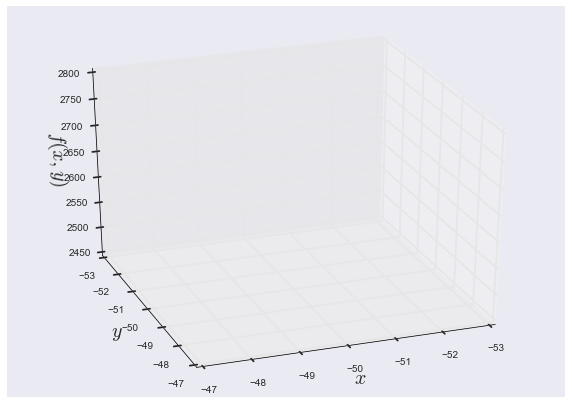

In [31]:
nb_of_zs = 200
zs = np.linspace(-50, -50, num=nb_of_zs) # input 
zs_1, zs_2 = np.meshgrid(zs, zs) # generate grid
y = np.zeros((nb_of_zs, nb_of_zs, 2)) # initialize output
# Fill the output matrix for each combination of input z's
for i in range(nb_of_zs):
    for j in range(nb_of_zs):
        y[i,j,:] = wide_bowl(np.asarray([zs_1[i,j], zs_2[i,j]]))

# Plot the cost function surfaces for both classes
fig = plt.figure()
# Plot the cost function surface for t=1
ax = fig.gca(projection='3d')
surf = ax.plot_surface(zs_1, zs_2, y[:,:,0], linewidth=0, cmap=cm.coolwarm)
ax.view_init(elev=30, azim=70)
# cbar = fig.colorbar(surf)
ax.set_xlabel('$x$', fontsize=20)
ax.set_ylabel('$y$', fontsize=20)
ax.set_zlabel('$f(x,y)$', fontsize=20)

#Increase size of plot
fig = plt.gcf()
fig.set_size_inches(10, 7)

The wide-bowl as pictured in Fig. 4.6
<img src="images/fig4_6.png">

The Hessian carries information about the rate that the slope is increasing. "The large positive eigenvalue of the Hessian corresponding to the eigenvector pointed in this direciton inidicates that the directional derivative is rapidly increasing, so an optimization algorithm based onthe Hessian could predict that the steepest direction is not actually a promising searchdirection in this context"

See Newton's Algorithm which uses the Taylor series approximation to the function f(x) around the current point to give a better path to the point of interest. 

In our wide-bowl example above, the Gradient and Hessian are as follows - 

J = [2x, 0.1y]

H = [[2, 0], [0, 0.1]]

If we introduced the Hessian via the second-order Taylor series expansion of our function f(x) as we take steps towards minimum, we can correct the direction of our steps according to the surface's curvature. 

$f(x^{(0)}− \epsilon g) ≈ f(x^{(0)}) − \epsilon g^{T}g +\frac{1}{2}\epsilon2g^THg $  
(equation 4.9)

If the gradient does align with the eigenvector of $\boldsymbol H$ corresponding to maximum eigenvalue, the learning rate is appropriately scaled. 

Extra Note:
For "positive definite quadratic function", Newton's method will jump directly to the minimum of function.  This is the case when applying Newton's algorithm for linear regression. (See De Freidas Slide). 

First-order (using only the gradient) vs second-order (using gradient and Hessian matrix) optimization algorithms